In [77]:
#Import libraries

from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm
import numpy as np
import pandas as pd

#MinMaxScaler
from sklearn.preprocessing import MinMaxScaler

In [78]:
df_als = pd.read_csv("als_data.csv")

In [79]:
df_als.head()

,ID,Age_mean,Albumin_max,Albumin_median,Albumin_min,Albumin_range,ALSFRS_slope,ALSFRS_Total_max,ALSFRS_Total_median,ALSFRS_Total_min,...,Sodium_min,Sodium_range,SubjectID,trunk_max,trunk_median,trunk_min,trunk_range,Urine.Ph_max,Urine.Ph_median,Urine.Ph_min
0,1,65,57.0,40.5,38.0,0.066202,-0.965608,30,28.0,22,...,143.0,0.017422,533,8,7.0,7,0.002646,6.0,6.0,6.0
1,2,48,45.0,41.0,39.0,0.010453,-0.921717,37,33.0,21,...,136.0,0.010453,649,8,7.0,5,0.005386,7.0,5.0,5.0
2,3,38,50.0,47.0,45.0,0.008929,-0.914787,24,14.0,10,...,140.0,0.008929,1234,5,0.0,0,0.008929,6.0,5.0,5.0
3,4,63,47.0,44.0,41.0,0.012111,-0.598361,30,29.0,24,...,138.0,0.012469,2492,5,5.0,3,0.004988,7.0,6.0,5.0
4,5,63,47.0,45.5,42.0,0.008292,-0.444039,32,27.5,20,...,138.0,0.008292,2956,6,4.0,1,0.008489,6.0,5.0,5.0


# Remove any data that is not relevant to the patient’s ALS condition

In [80]:
df_als = df_als.drop(columns={'ID','SubjectID'},axis=1)

In [81]:
df_als.head()

,Age_mean,Albumin_max,Albumin_median,Albumin_min,Albumin_range,ALSFRS_slope,ALSFRS_Total_max,ALSFRS_Total_median,ALSFRS_Total_min,ALSFRS_Total_range,...,Sodium_median,Sodium_min,Sodium_range,trunk_max,trunk_median,trunk_min,trunk_range,Urine.Ph_max,Urine.Ph_median,Urine.Ph_min
0,65,57.0,40.5,38.0,0.066202,-0.965608,30,28.0,22,0.021164,...,145.5,143.0,0.017422,8,7.0,7,0.002646,6.0,6.0,6.0
1,48,45.0,41.0,39.0,0.010453,-0.921717,37,33.0,21,0.028725,...,138.0,136.0,0.010453,8,7.0,5,0.005386,7.0,5.0,5.0
2,38,50.0,47.0,45.0,0.008929,-0.914787,24,14.0,10,0.025000,...,143.0,140.0,0.008929,5,0.0,0,0.008929,6.0,5.0,5.0
3,63,47.0,44.0,41.0,0.012111,-0.598361,30,29.0,24,0.014963,...,139.0,138.0,0.012469,5,5.0,3,0.004988,7.0,6.0,5.0
4,63,47.0,45.5,42.0,0.008292,-0.444039,32,27.5,20,0.020374,...,140.0,138.0,0.008292,6,4.0,1,0.008489,6.0,5.0,5.0


# Apply a standard scalar to the data

In [82]:
#Initialize MinMaxScaler
scaler = MinMaxScaler()

# transform data
scaled_data = scaler.fit_transform(df_als)

In [83]:
scaled_data

array([[0.74603175, 0.6006006 , 0.36144578, ..., 0.25      , 0.25      ,
        0.33333333],
       [0.47619048, 0.24024024, 0.39156627, ..., 0.5       , 0.        ,
        0.        ],
       [0.31746032, 0.39039039, 0.75301205, ..., 0.25      , 0.        ,
        0.        ],
       ...,
       [0.46031746, 0.27027027, 0.57228916, ..., 1.        , 0.25      ,
        0.        ],
       [0.3015873 , 0.36036036, 0.57228916, ..., 0.25      , 0.        ,
        0.        ],
       [0.47619048, 0.33033033, 0.63253012, ..., 0.        , 0.        ,
        0.        ]])

# Create a plot of the cluster silhouette score versus the number of clusters in a K-means cluster

In [84]:
#Import libraries
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm

For n_clusters = 2 The average silhouette_score is : 0.5646624453149653
For n_clusters = 3 The average silhouette_score is : 0.46074229932446703
For n_clusters = 4 The average silhouette_score is : 0.37737357000015487
For n_clusters = 5 The average silhouette_score is : 0.3195837892820233
For n_clusters = 6 The average silhouette_score is : 0.28880834686513246
For n_clusters = 8 The average silhouette_score is : 0.24945193518394654


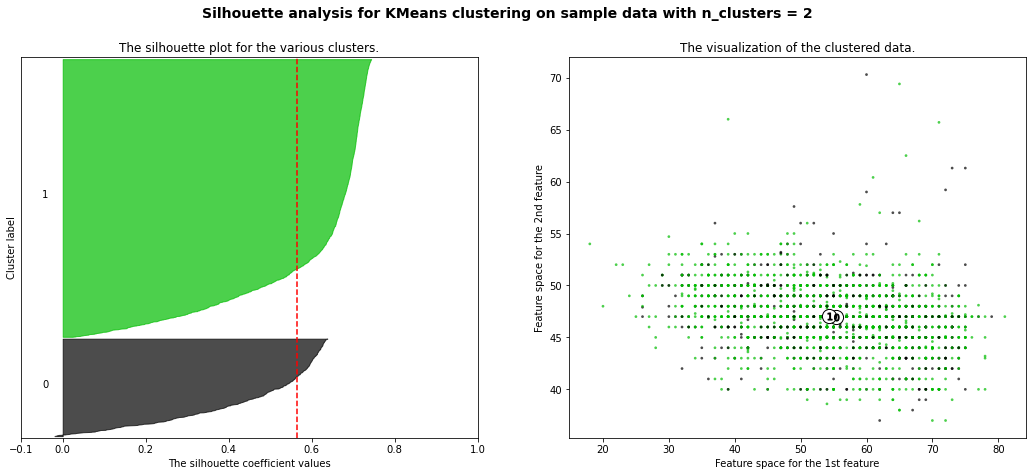

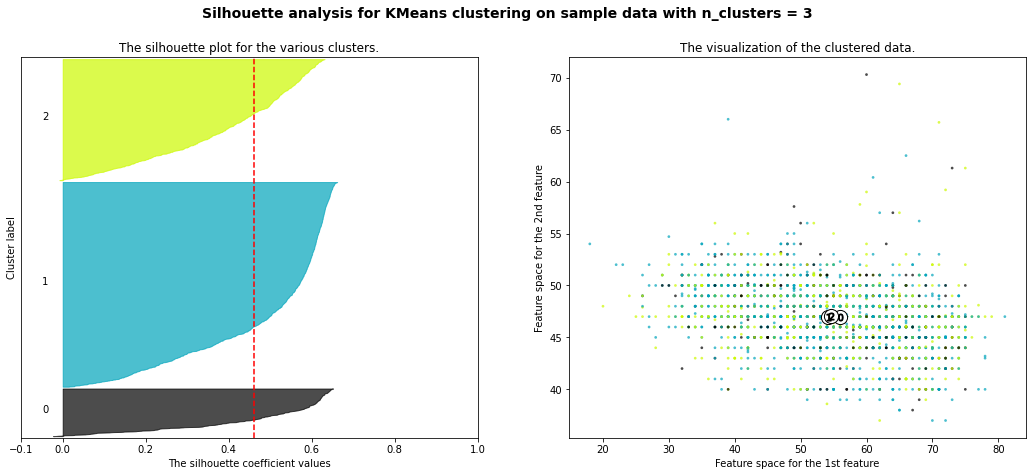

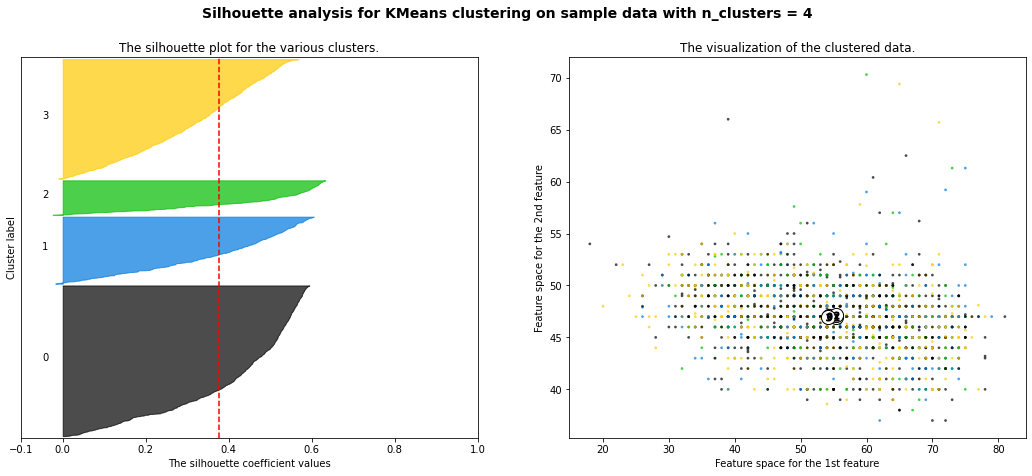

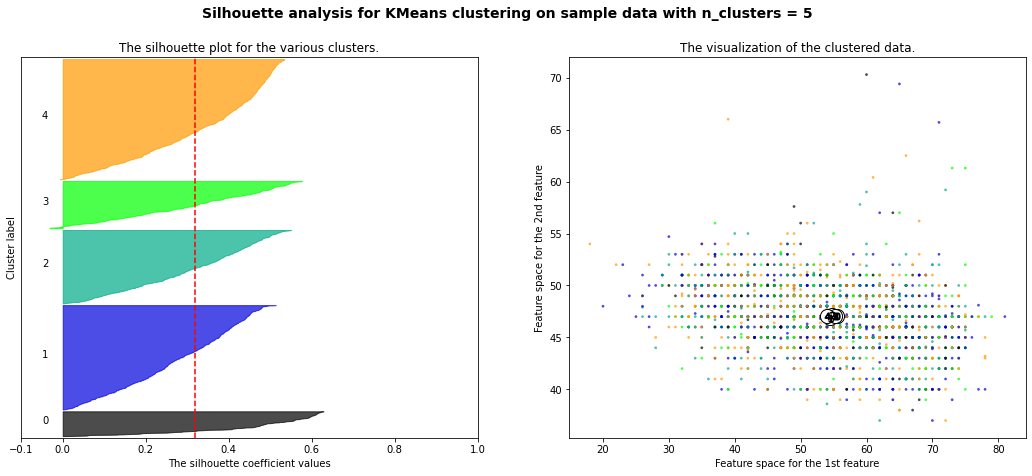

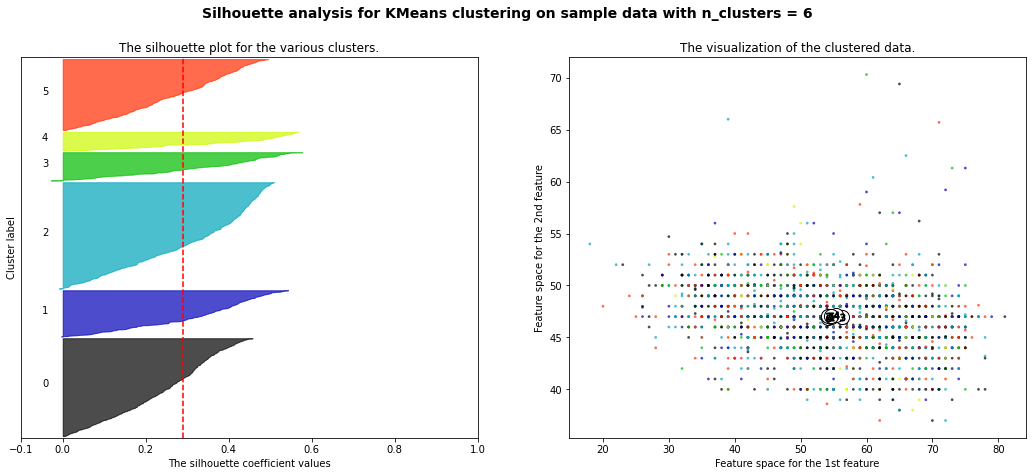

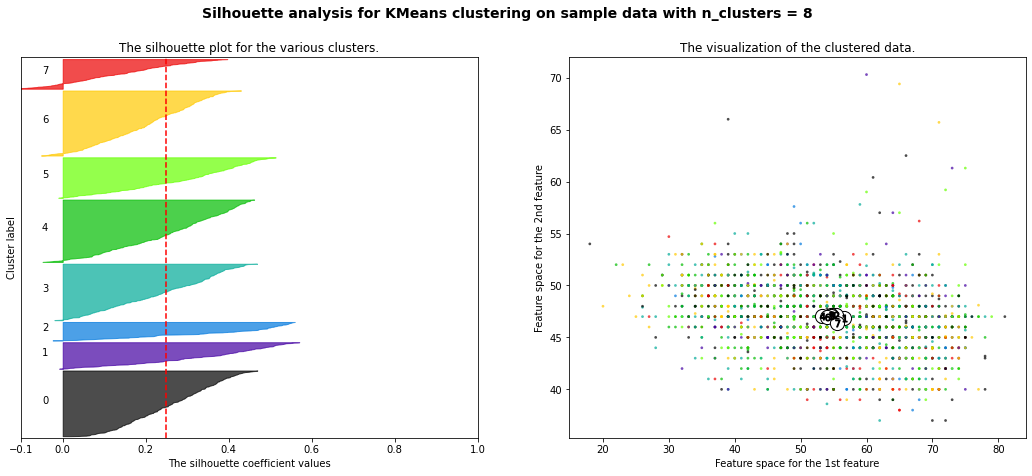

In [85]:
range_n_clusters = [2, 3, 4, 5, 6, 8]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(df_als) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(df_als)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(df_als, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(df_als, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(
        df_als.iloc[:, 0], df_als.iloc[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

plt.show()

# Use the plot created in (3) to choose on optimal number of clusters for K-means. Justify your choice

Silhouette score represents the similarity of objects within the clusters.

Silhouette score rangese from -1 to 1. Higher score indicates that the object is well matched.

In our case, n_cluster = 2 has the highest score (0.564) amongst others. As n_cluster value increases silhouette_score decreases.

We can confirm that n_clusters 3 and above are bad choices and n_clusters = 2 is the best choice.

Optimal number of clusters for K-means is 2 i.e., n_clusters = 2

# Fit a PCA transformation with two features to the scaled data

In [119]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 15)

# Fit a K-means model to the data with the optimal number of clusters chosen in part (4)

In [120]:
X_pca = pca.fit_transform(scaled_data)

kmeans = KMeans(n_clusters=2, random_state=10)
y_pred = clusterer.fit_predict(scaled_data)

# Make a scatterplot the PCA transformed data coloring each point by its cluster value

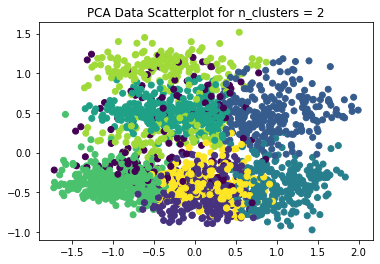

In [121]:
plt.scatter(X_pca[:,0], X_pca[:,1], c=y_pred)
plt.title('PCA Data Scatterplot for n_clusters = 2')
plt.show()

In [122]:
# Show the variance between the two features within the PCA.
explained_variance = pca.explained_variance_ratio_
explained_variance

array([0.24005692, 0.1304401 , 0.09912642, 0.05770486, 0.05151021,
       0.04085792, 0.02907999, 0.02785823, 0.02569873, 0.02296304,
       0.01747365, 0.01571195, 0.01429157, 0.01253185, 0.01179188])

In [133]:
print ( "Components: ", pca.n_components_ , "\nExplained Variance Ratio: ",
      round(pca.explained_variance_ratio_.sum(),2), "\nExplained Variance Ratio Percentage: ",
      round((pca.explained_variance_ratio_.sum()*100),0), "%")

Components:  15 
Explained Variance Ratio:  0.8 
Explained Variance Ratio Percentage:  80.0 %


# Summarize your results and make a conclusion.

Explained Variance Ratio is a metric to evaluate the usefulness of principal components and to choose how many components to use in PCA model.

Ideally, we need to choose the number of components to include in your model by adding the explained variance ratio
of each component until you reach a total of around 0.8 or 80% to avoid overfitting.

I have used trial and error method to get the explained ratio by increasing the n_components from 2 to 15. While if we are choosing n_components as 16, its going over 81%.

So, I have choosen 15 as the best n_components for PCA.